### IMPORTING NECESSARY LIBRARIES BELOW

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

##### READING DATA SET BELOW

In [23]:
my_data = pd.read_csv("dataset/data.csv", delimiter=",")
my_data[0:5]

,Sequence,Tag,Timestamp,Date,x,y,z,Activity
0,A01,010-000-024-033,6.337900e+17,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,6.337900e+17,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,6.337900e+17,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,6.337900e+17,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,6.337900e+17,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking


#### CREATING OUR INPUT VECTOR X

In [24]:
X = my_data[['Tag','x', 'y', 'z']].values
X[0:4]

array([['010-000-024-033', 4.062931061, 1.892434239, 0.507425427],
       ['020-000-033-111', 4.291953564, 1.781140447, 1.344495296],
       ['020-000-032-221', 4.359101295, 1.826455712, 0.968820989],
       ['010-000-024-033', 4.087835312, 1.879998684, 0.466983408]],
      dtype=object)

#### PRE-PROCESSING TAG ATTRIBUTE SINCE IT CATEGORICAL IN NATURE

In [25]:
from sklearn import preprocessing
le_tag = preprocessing.LabelEncoder()
le_tag.fit(['010-000-024-033','020-000-033-111','020-000-032-221','010-000-030-096'])
X[:,0] = le_tag.transform(X[:,0])

#### OUR GOAL:Y IS ACTIVITY ATTRIBUTE.

In [26]:
y = my_data["Activity"]
y[0:5]

0    walking
1    walking
2    walking
3    walking
4    walking
Name: Activity, dtype: object

##### WE BREAK OUR DATA SET INTO TRAINING AND TESTING DATASET BELOW AND APPLY INFORMATION GAIN METHOD ON IT FOR ATTRIBUTE SELECTION

In [27]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
postureTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
postureTree.fit(X_trainset,y_trainset)
predTree = postureTree.predict(X_testset)

In [28]:
# from sklearn.model_selection import train_test_split
# X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
# postureTree2 = DecisionTreeClassifier(criterion="gini", max_depth = 4)
# postureTree2.fit(X_trainset,y_trainset)
# predTree = postureTree2.predict(X_testset)

In [29]:
print (predTree [0:5])
print (y_testset [0:5])

['lying' 'lying' 'lying' 'standing up from lying' 'lying']
150191                     lying
153273                   falling
102168    standing up from lying
57274                      lying
136816                     lying
Name: Activity, dtype: object


### EVALUATING DECISION'S TREE ACCURACY BELOW

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.4896680011322738


#### IMPORTING NECESSARY LIBRARIES FOR VISUALIZATION OF THE DECISION TREE

In [32]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

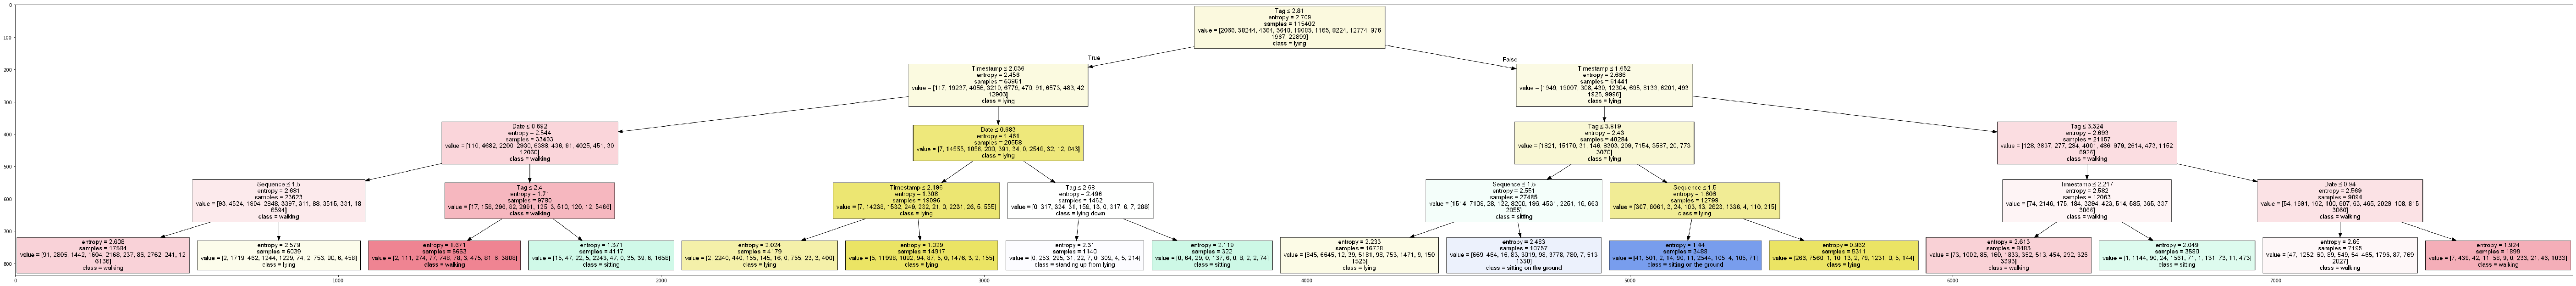

In [33]:
dot_data = StringIO()
filename = "posture.png"
featureNames = my_data.columns[0:4]
targetNames = my_data["Activity"].unique().tolist()
out=tree.export_graphviz(postureTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')